In [2]:
#영화리뷰를 사용한 텍스트 분류

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import json 
import os

In [3]:
#데이터 불러오기
#네이버 영화 감성 분석 데이터 다운로드

!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 21.58 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Updating files: 100% (14737/14737), done.


In [4]:
import os
os.listdir('nsmc')

['README.md',
 'raw',
 '.git',
 'ratings.txt',
 'code',
 'synopses.json',
 'ratings_train.txt',
 'ratings_test.txt']

In [6]:
train=pd.read_table('nsmc/'+'ratings_train.txt')
test=pd.read_table('nsmc/'+'ratings_test.txt')

In [8]:
print('훈련 샘플: {}, 검증: {}'.format(len(train), len(test)))

훈련 샘플: 150000, 검증: 50000


In [12]:
#데이터 분석
train[50:70]
#라벨 > 이진 분류 (0,1)

,id,document,label
50,9063648,영화가 사람의 영혼을 어루만져 줄 수도 있군요 거친 세상사를 잠시 잊고 동화같은 영...,1
51,8272095,야 세르게이! 작은고추의 매운맛을 보여주마! 포퐁저그 콩진호가 간다,0
52,2345905,이렇게 가슴시리게 본 드라마가 또 있을까? 감동 그 자체!,1
53,7865630,"난또 저 꼬마애가 무슨 원한이 깊길래.,. 했더니 OO 그냥 혼자 나대다 OO걸 어...",0
54,7207064,재미있어요,1
55,5719655,전 좋아요,1
56,1651126,최고,0
57,7246040,너무 충격적이엇다. 기분을 완전히 푹 꺼지게 하는 느낌... 활력이라고는 하나도 없...,1
58,717775,심심한영화.,0
59,8317483,백봉기 언제나오나요?,1


In [13]:
train_data=train['document']
train_labels=train['label']

test_data=test['document']
test_labels=test['label']

In [17]:
test_data[:10]

0                                                  굳 ㅋ
1                                 GDNTOPCLASSINTHECLUB
2               뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3                     지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4    3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
5                                   음악이 주가 된, 최고의 음악영화
6                                              진정한 쓰레기
7             마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
8    갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한c...
9       이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..
Name: document, dtype: object

In [18]:
#데이터 전처리
# 1) 토큰화 (tokenizing)

def tokenizing(sentence):
    if isinstance(sentence, str):
        sentence=sentence.split(' ') #공백기준으로 자름
    else:
        sentence='' #노이즈 데이터 처리
    return sentence

In [20]:
train_data_list = train_data.apply(tokenizing)
test_data_list = test_data.apply(tokenizing)

In [22]:
train_data_list[:5]

0                            [아, 더빙.., 진짜, 짜증나네요, 목소리]
1               [흠...포스터보고, 초딩영화줄....오버연기조차, 가볍지, 않구나]
2                                  [너무재밓었다그래서보는것을추천한다]
3                 [교도소, 이야기구먼, ..솔직히, 재미는, 없다..평점, 조정]
4    [사이몬페그의, 익살스런, 연기가, 돋보였던, 영화!스파이더맨에서, 늙어보이기만, ...
Name: document, dtype: object

In [23]:
#토크나이저 (tokenizer)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data_list)

In [25]:
#2) 정수인코딩(integer encoding)
# 문장 > 시퀀스 변환

train_data_ids=tokenizer.texts_to_sequences(train_data_list)
test_data_ids=tokenizer.texts_to_sequences(test_data_list)

In [27]:
train_data_ids[0]

[50, 42604, 4, 10484, 1064]

In [31]:
print(len(train_data_ids[0]))
print(len(train_data_ids[2]))

#> 엥 문장의 길이가 각기 다르넹

5
1


In [32]:
#3) 문장 패딩(padding)

train_data_padded=keras.preprocessing.sequence.pad_sequences(train_data_ids, value=0, padding='post', maxlen=50) #padding='post' 뒤에 붙이겠음
test_data_padded=keras.preprocessing.sequence.pad_sequences(test_data_ids, value=0, padding='post', maxlen=50)

In [38]:
print(train_data_padded[0].shape)
print(train_data_padded[0])
print(test_data_padded[0].shape)
print(test_data_padded[0])

(50,)
[   50 42604     4 10484  1064     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]
(50,)
[923  59   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [40]:
from keras.api._v2.keras import activations
# 4) 모델       
#입력 크기는 영화 리뷰 데이터 셋에서 적용된 어휘 사전의 크기입니다
#10000갸의 단어

vocab_size=10000
model=keras.Sequential()

model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(50,))) #벡터화
#vocab_size 단어크기 16 원하는 벡터의 길이(타원)
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [41]:
#5) 모델 학습

train_labels[:5]

0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64

In [42]:
# 환경설정

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
#학습

history = model.fit(train_data_padded,
          train_labels,
          epochs=30,
          batch_size=100)

Epoch 1/30
1500/1500 [==============================] - 73s 44ms/step - loss: 0.5167 - accuracy: 0.7164
Epoch 2/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4256 - accuracy: 0.7826
Epoch 3/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4128 - accuracy: 0.7878
Epoch 4/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4070 - accuracy: 0.7894
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4027 - accuracy: 0.7920
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3988 - accuracy: 0.7929
Epoch 7/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3931 - accuracy: 0.7940
Epoch 8/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3856 - accuracy: 0.7947
Epoch 9/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3784 - accuracy: 0.7971
Epoch 10/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0

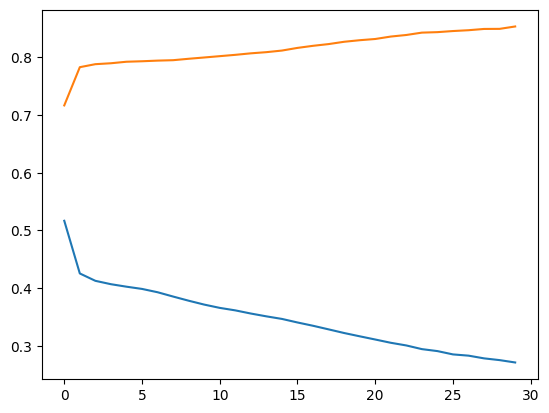

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [46]:
#6) 모델 성능 평가
test_data_padded.shape

(50000, 50)

In [49]:
result=model.evaluate(test_data_padded, test_labels, verbose=2)
print(result[1])

1563/1563 - 3s - loss: 0.8248 - accuracy: 0.7444 - 3s/epoch - 2ms/step
0.7444199919700623


In [48]:
#모델 적용 > 추론
#추론할 리뷰 문장

sentence='오늘은 기분이 좋지 않아요. 헤어질 결심'

#토큰화
sentence=sentence.split(' ')

#정수 인코딩
sentence_ids=tokenizer.texts_to_sequences([sentence])

#페딩
sentence_padded=keras.preprocessing.sequence.pad_sequences(sentence_ids,
                                           value=0,
                                           padding='post',
                                           maxlen=50)

sentence_padded

array([[ 6131,   792,  2966,  8731, 35615,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [53]:
result=model.predict(sentence_padded)
print(result)

if result > 0.5:
    print(f'긍정 댓글입니다. 확률:{result}')
else:
    print(f'부정 댓글입니다. 확률:{result}')

1/1 [==============================] - 0s 20ms/step
[[0.89305896]]
긍정 댓글입니다. 확률:[[0.89305896]]


감성 분류 with RNN, LSTM

In [57]:
#1. 모델링 (LNN)

model=tf.keras.Sequential([
     #임베딩 레이어(embedding layer)
     tf.keras.layers.Embedding(vocab_size, 64),

     #RNN layer
     tf.keras.layers.SimpleRNN(16),

     #DENSE layer
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
                           
                           
                           ])

In [58]:
#2. 학습

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
history=model.fit(train_data_padded,
          train_labels,
          epochs=20,
          batch_size=100)

Epoch 1/20
1500/1500 [==============================] - 138s 91ms/step - loss: 0.6457 - accuracy: 0.6185
Epoch 2/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.5572 - accuracy: 0.7154
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.4951 - accuracy: 0.7567
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.4442 - accuracy: 0.7865
Epoch 5/20
1500/1500 [==============================] - 62s 41ms/step - loss: 0.3948 - accuracy: 0.8106
Epoch 6/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3527 - accuracy: 0.8303
Epoch 7/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.3243 - accuracy: 0.8428
Epoch 8/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.3030 - accuracy: 0.8513
Epoch 9/20
1500/1500 [==============================] - 60s 40ms/step - loss: 0.2827 - accuracy: 0.8612
Epoch 10/20
1500/1500 [==============================] - 58s 39

In [60]:
#3 모델 성능 평가

result=model.evaluate(test_data_padded, test_labels, verbose=2)
print(result[1])

1563/1563 - 9s - loss: 0.8622 - accuracy: 0.6983 - 9s/epoch - 6ms/step
0.6982799768447876


In [61]:
#4. 추론 (모델 적용)

sentence='이 영화 정말 재미있음! 추천함'

#토큰화
sentence=sentence.split(' ')

#정수 인코딩
sentence_ids=tokenizer.texts_to_sequences([sentence])

#페딩
sentence_padded=keras.preprocessing.sequence.pad_sequences(sentence_ids,
                                           value=0,
                                           padding='post',
                                           maxlen=50)

sentence_padded

array([[    5,     1,     3, 72985,  9346,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [62]:
#예측

result=model.predict(sentence_padded)
print(result)

if result > 0.5:
    print(f'긍정 댓글입니다. 확률:{result}')
else:
    print(f'부정 댓글입니다. 확률:{result}')

1/1 [==============================] - 0s 137ms/step
[[0.99732816]]
긍정 댓글입니다. 확률:[[0.99732816]]
